# Preparing Datasets

In [ ]:
import pandas as pd
import csv

dataset = pd.read_csv("Crop_recommendation.csv")
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
dataset['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
dataset.drop(['N', 'P', 'K', 'ph', 'rainfall'], axis=1, inplace=True)
dataset

,temperature,humidity,label
0,20.879744,82.002744,rice
1,21.770462,80.319644,rice
2,23.004459,82.320763,rice
3,26.491096,80.158363,rice
4,20.130175,81.604873,rice
...,...,...,...
2195,26.774637,66.413269,coffee
2196,27.417112,56.636362,coffee
2197,24.131797,67.225123,coffee
2198,26.272418,52.127394,coffee


In [ ]:
added = pd.read_csv("fertilizer.csv")
added.drop(['Unnamed: 0', 'N', 'P', 'K', 'pH'], axis=1, inplace=True)
added

,Crop,soil_moisture
0,rice,30
1,maize,50
2,chickpea,60
3,kidneybeans,45
4,pigeonpeas,45
5,mothbeans,30
6,mungbean,80
7,blackgram,60
8,lentil,90
9,pomegranate,30


In [ ]:
added.rename(columns={'Crop': 'label'}, inplace=True)

In [ ]:
added

,label,soil_moisture
0,rice,30
1,maize,50
2,chickpea,60
3,kidneybeans,45
4,pigeonpeas,45
5,mothbeans,30
6,mungbean,80
7,blackgram,60
8,lentil,90
9,pomegranate,30


In [ ]:
result = pd.merge(dataset, added, on='label', how='left')
result

,temperature,humidity,label,soil_moisture
0,20.879744,82.002744,rice,30
1,21.770462,80.319644,rice,30
2,23.004459,82.320763,rice,30
3,26.491096,80.158363,rice,30
4,20.130175,81.604873,rice,30
...,...,...,...,...
2195,26.774637,66.413269,coffee,20
2196,27.417112,56.636362,coffee,20
2197,24.131797,67.225123,coffee,20
2198,26.272418,52.127394,coffee,20


In [ ]:
result.to_csv("crop_recommendation.csv")

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    2200 non-null   float64
 1   humidity       2200 non-null   float64
 2   label          2200 non-null   object 
 3   soil_moisture  2200 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 68.9+ KB


# Building ML models

In [81]:
import pandas as pd
result = pd.read_csv("crop_recommendation.csv")
result

,Unnamed: 0,temperature,humidity,label,soil_moisture
0,0,20.879744,82.002744,rice,30
1,1,21.770462,80.319644,rice,30
2,2,23.004459,82.320763,rice,30
3,3,26.491096,80.158363,rice,30
4,4,20.130175,81.604873,rice,30
...,...,...,...,...,...
2195,2195,26.774637,66.413269,coffee,20
2196,2196,27.417112,56.636362,coffee,20
2197,2197,24.131797,67.225123,coffee,20
2198,2198,26.272418,52.127394,coffee,20


In [82]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2200 non-null   int64  
 1   temperature    2200 non-null   float64
 2   humidity       2200 non-null   float64
 3   label          2200 non-null   object 
 4   soil_moisture  2200 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 86.1+ KB


In [83]:
result.drop(['Unnamed: 0'], axis=1, inplace=True)
result

,temperature,humidity,label,soil_moisture
0,20.879744,82.002744,rice,30
1,21.770462,80.319644,rice,30
2,23.004459,82.320763,rice,30
3,26.491096,80.158363,rice,30
4,20.130175,81.604873,rice,30
...,...,...,...,...
2195,26.774637,66.413269,coffee,20
2196,27.417112,56.636362,coffee,20
2197,24.131797,67.225123,coffee,20
2198,26.272418,52.127394,coffee,20


In [84]:
result.to_csv("crop_recommend.csv")

In [85]:
features = result[['temperature', 'humidity', 'soil_moisture']]
target = result['label']
labels = result['label']

In [86]:
acc = []
model = []

In [87]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

## Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)

DT_predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, DT_predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Akurasi Decision Tree: ", x*100)

print(classification_report(Ytest, DT_predicted_values))

Akurasi Decision Tree:  92.27272727272727
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.48      1.00      0.65        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      0.45      0.62        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      1.00      1.00        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       0.00      0.00      0.00        23
      orange       1.00      1.00      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [114]:
from sklearn.model_selection import cross_val_score
DT_score = cross_val_score(DecisionTree, features, target,cv=5)
DT_score

array([0.925     , 0.92727273, 0.92954545, 0.92954545, 0.93181818])

In [115]:
import pickle

DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

## Gaussian Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain,Ytrain)
NB_predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, NB_predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Akurasi Naive Bayes: ", x)
print(classification_report(Ytest, NB_predicted_values))

Akurasi Naive Bayes:  0.9818181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.88      0.75      0.81        20
      grapes       1.00      1.00      1.00        18
        jute       0.97      1.00      0.98        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1

In [117]:
NB_score = cross_val_score(NaiveBayes,features,target,cv=5)
NB_score

array([0.98181818, 0.98181818, 0.97954545, 0.97954545, 0.99090909])

In [118]:
import pickle

NB_pkl_filename = 'GNBClassifier.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

## Support Vector Machine (SVM)

In [119]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')
SVM.fit(Xtrain,Ytrain)
SVM_predicted_values = SVM.predict(Xtest)
x = metrics.accuracy_score(Ytest, SVM_predicted_values)
acc.append(x)
model.append('SVM')
print("Akurasi SVM: ", x)

print(classification_report(Ytest, SVM_predicted_values))

Akurasi SVM:  0.9704545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.88      0.70      0.78        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.93      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00     

In [120]:
SVM_score = cross_val_score(SVM,features,target,cv=5)
SVM_score

array([0.98409091, 0.975     , 0.97727273, 0.975     , 0.98863636])

In [121]:
import pickle

SVM_pkl_filename = 'SVM.pkl'
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
SVM_Model_pkl.close()

## Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
LR_predicted_values = LogReg.predict(Xtest)
x = metrics.accuracy_score(Ytest, LR_predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Akurasi Logistic Regression: ", x)
print(classification_report(Ytest, LR_predicted_values))

Akurasi Logistic Regression:  0.8818181818181818
              precision    recall  f1-score   support

       apple       0.93      1.00      0.96        13
      banana       0.89      1.00      0.94        17
   blackgram       0.71      0.94      0.81        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      0.90      0.95        21
      coffee       1.00      0.95      0.98        22
      cotton       0.65      0.55      0.59        20
      grapes       0.55      0.67      0.60        18
        jute       0.90      0.96      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       0.62      0.24      0.34        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.90      1.00      0.95        19
    mungbean       0.83      0.83      0.83        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      0.9

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
LR_score = cross_val_score(LogReg,features,target,cv=5)
LR_score

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.87045455, 0.85909091, 0.85681818, 0.84090909, 0.86590909])

In [124]:
import pickle

LR_pkl_filename = 'LogisticRegression.pkl'
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
LR_Model_pkl.close()

## Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)
RF_predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, RF_predicted_values)
acc.append(x)
model.append('RF')
print("Akurasi Random Forest: ", x)
print(classification_report(Ytest, RF_predicted_values))

Akurasi Random Forest:  0.9863636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.85      0.85      0.85        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      1.00      1.00        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

In [126]:
RF_score = cross_val_score(RF,features,target,cv=5)
RF_score

array([0.97045455, 0.975     , 0.97045455, 0.98409091, 0.98409091])

In [127]:
import pickle

RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
RF_Model_pkl.close()

## XGBoost

In [128]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Ytrain_encoded = label_encoder.fit_transform(Ytrain)
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

Ytest_encoded = label_encoder.transform(Ytest)
XB_predicted_values = XB.predict(Xtest)
predicted_labels = label_encoder.inverse_transform(XB_predicted_values)

x = metrics.accuracy_score(Ytest_encoded, XB_predicted_values)
acc.append(x)
model.append('XGBoost')
print("Akurasi XGBoost: ", x)
print(classification_report(Ytest_encoded, XB_predicted_values))

Akurasi XGBoost:  0.9840909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.84      0.80      0.82        20
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00 

In [129]:
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

XB_score = cross_val_score(XB, features, target_encoded, cv=5)
XB_score

array([0.97954545, 0.97272727, 0.96818182, 0.98409091, 0.98181818])

In [130]:
import pickle

XB_pkl_filename = 'XB.pkl'
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
XB_Model_pkl.close()

## KNN



In [131]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(Xtrain,Ytrain)
KNN_predicted_values = KNN.predict(Xtest)

x = metrics.accuracy_score(Ytest, KNN_predicted_values)
acc.append(x)
model.append('KNN')
print("Akurasi KNN: ", x)
print(classification_report(Ytest, KNN_predicted_values))

Akurasi KNN:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.89      0.80      0.84        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.93      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00     

In [132]:
KNN_score = cross_val_score(KNN,features,target,cv=5)
KNN_score

array([0.97954545, 0.98181818, 0.97727273, 0.97727273, 0.98409091])

In [133]:
import pickle

KNN_pkl_filename = 'KNN.pkl'
KNN_Model_pkl = open(KNN_pkl_filename, 'wb')
pickle.dump(KNN, KNN_Model_pkl)
KNN_Model_pkl.close()

## Accuracy Comparison

<ipython-input-134-6c692784c02f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc, y = model, palette='dark')


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

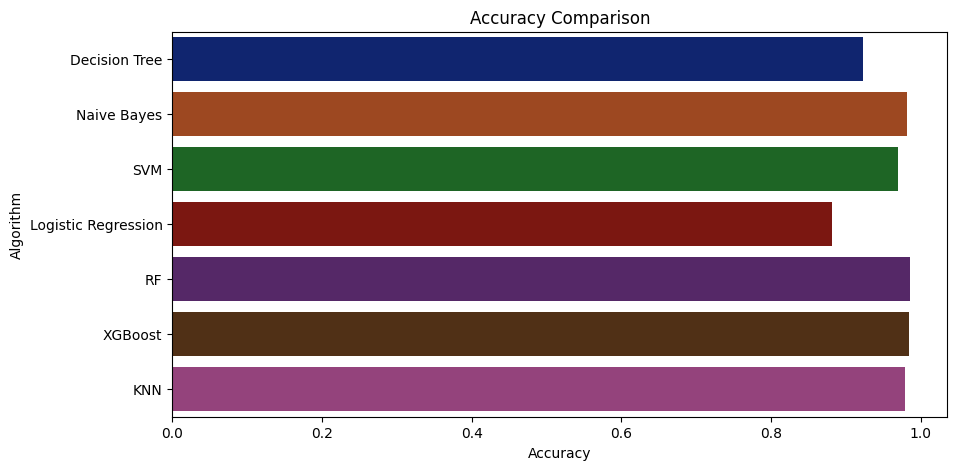

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc, y = model, palette='dark')

In [135]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9227272727272727
Naive Bayes --> 0.9818181818181818
SVM --> 0.9704545454545455
Logistic Regression --> 0.8818181818181818
RF --> 0.9863636363636363
XGBoost --> 0.9840909090909091
KNN --> 0.9795454545454545


In [136]:
import numpy as np

data = np.array([[25, 50, 40]])
prediction = RF.predict(data)
print(prediction)

['pigeonpeas']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
